In [207]:
import numpy as np

from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import colormaps as cmaps

import time

In [283]:
def correlator_PBC(f,g):
    """Accepts arrays f,g [Nx,Nky,Nw] and returns the circular autocorrelation with automatically zero-padded last axis.
    Precisely this retuns z[i,j,k] = sum_{l,m,n} x[l,m,n] * y[i+l,j+m,k+n] padded appropriately on last axis.
    Finally, this shifts the frequencies to the center again at the end. 
    """
    pad_size = f.shape[-1]
    
    f_padded = np.pad(f,( (0,0),(0,0),(pad_size,pad_size) ) ) 
    g_padded = np.pad(g,( (0,0),(0,0),(pad_size,pad_size) ) )  

    ### Now we take the FFT of both arrays 
    f_fft = np.fft.fftn(f_padded)
    g_fft = np.fft.fftn(g_padded)
    
    ### Next we take an element-wise product 
    ### conjugate to compute correlation instead of convolution
    h_fft = f_fft*np.conjugate(g_fft) 

    ### Now we transform back
    h_padded = np.fft.ifftn(h_fft)

    ### Roll and chop
    h = np.fft.fftshift(h_padded,axes=-1)
    h = h[:,:,pad_size:2*pad_size]
    
    return np.real(h)

In [289]:
Nx = 10
Ny = 10
Nz = 80
x = np.linspace(0.,2.*np.pi,Nx)
y = np.linspace(0.,2.*np.pi,Ny)
z = np.linspace(-5.,5.,Nz)

dz = z[1]-z[0]

In [290]:
xs,ys,zs = np.meshgrid(x,y,z)

In [291]:
def A1g(x,y):
    return 0.5*np.cos(x) +0.5*np.cos(y)

In [308]:
a1g = A1g(xs,ys)
box = np.ones_like(a1g)

box[:,:,z<-1.] = 0.
box[:,:,z>1.] = 0.

f = np.zeros_like(a1g)
f[5,5,:] = 1.
f[1,1,:] = 1.
f = f*box

g = f.copy()

h = correlator_PBC(f,g)*dz/float(Nx*Ny)

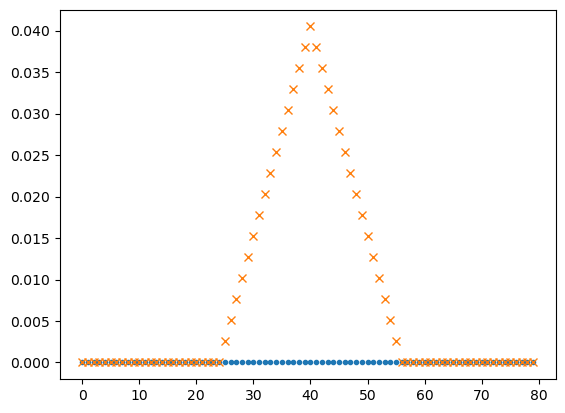

In [309]:
plt.plot(f[0,0,:],'.')
plt.plot(h[0,0,:],'x')
plt.show()

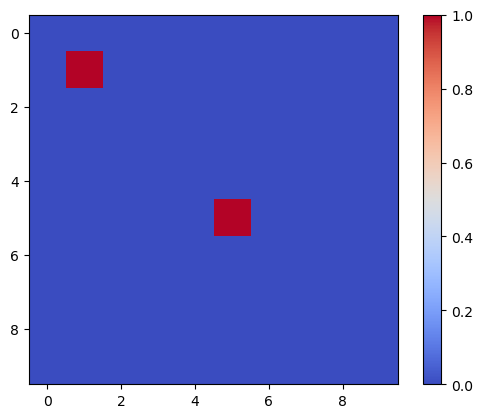

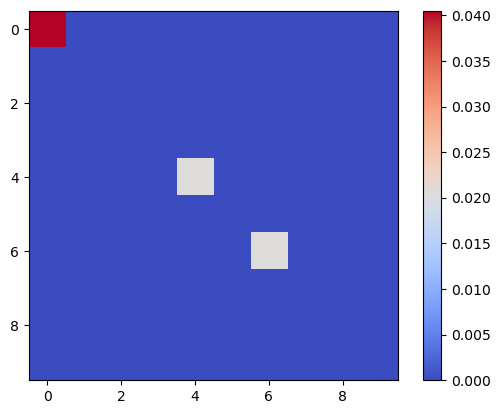

In [310]:
plt.imshow(f[...,40],cmap='coolwarm')
plt.colorbar()
plt.show()
plt.imshow(h[...,40],cmap='coolwarm')
plt.colorbar()
plt.show()
